In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import pymc as pm
import arviz as az
az.style.use('arviz-darkgrid')

## Non-Markovian methods

### Grid computing


In [3]:
from scipy import stats

In [4]:
def posterior_grid(grid_points=50, heads=6, tails=9):
    """ 
    A grid implementation for the coin-flipping problem 
    """
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(1/grid_points, grid_points)  # uniform prior
    likelihood = stats.binom.pmf(heads, heads+tails, grid)
    posterior = likelihood * prior
    posterior /= posterior.sum()
    return grid, posterior

Assuming we flip a coin 13 times and we observed 3 head we have:

[Text(0.5, 1.0, 'heads = 3, tails = 10'), [], Text(0.5, 0, 'θ')]

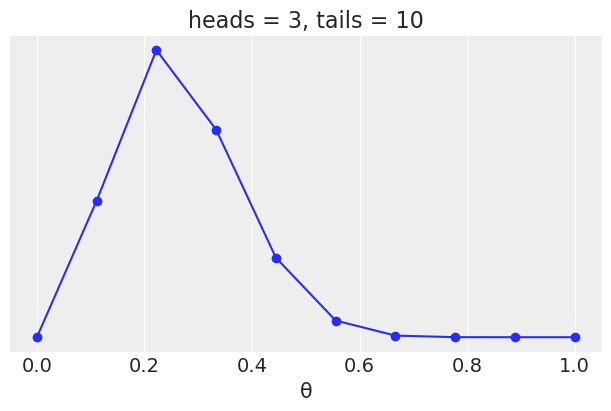

In [5]:
data = np.repeat([0, 1], (10, 3))
points = 10
h = data.sum()
t = len(data) - h
grid, posterior = posterior_grid(points, h, t)

_, ax = plt.subplots(figsize=(6, 4))

ax.plot(grid, posterior, 'o-')
ax.set(title=f'heads = {h}, tails = {t}', yticks=[], xlabel='θ')


### Quadratic method

In [6]:
with pm.Model() as normal_aproximation:
    p = pm.Beta('p', 1., 1.)
    w = pm.Binomial('w',n=1, p=p, observed=data)
    mean_q = pm.find_MAP()
    std_q = ((1/pm.find_hessian(mean_q, vars=[p]))**0.5)[0]

mean_q['p'], std_q

[Text(0.5, 1.0, 'heads = 3, tails = 10'), Text(0.5, 0, 'θ'), []]

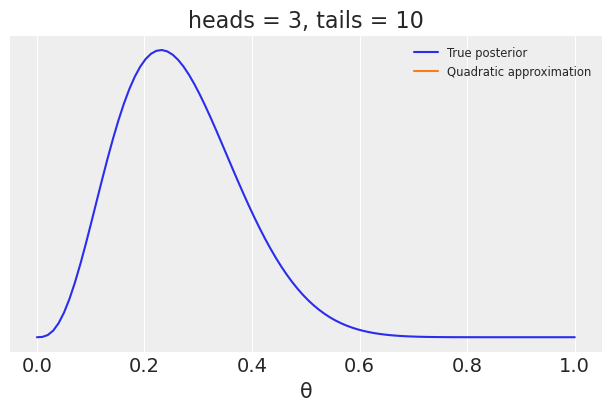

In [ ]:
x = np.linspace(0, 1, 100)

_, ax = plt.subplots(figsize=(6, 4))

ax.plot(x, stats.beta.pdf(x, h + 1, t + 1), label='True posterior')
# quadratic approximation
ax.plot(x,
        stats.norm.pdf(x, mean_q['p'], std_q),
        label='Quadratic approximation')
ax.legend(loc=0, fontsize='small')
ax.set(title=f'heads = {h}, tails = {t}', xlabel='θ', yticks=[])